In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
from sensorcnn.visualization.examples import *
from sensorcnn.dataset.examples import *

## Load examples in Pandas

In [4]:
all_samples = {}
for filename in csv_file_iterator("/data"):
    samples = load_from_csv(filename)
    all_samples[filename] = samples

/Users/mostafa/Conda/envs/muvr_ml/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
from functools import reduce
all_samples_df = reduce(lambda x, y: x.append(y), all_samples.values())

In [6]:
sample1 = all_samples["/data/arms_0A5E8ACF-34B1-49BC-90B9-1F4DE16A9E10.csv"]

#### Add a column to the dataframe for setup data and label only a the first time window of each excercise e.g. 1 second as setup for this excercise

In [7]:
def set_setup_column(df, start=0, end=50):
    sample1[['setup_label']] = 0
    n = 0
    for i, (s, is_excercise) in enumerate(zip(df[['label']].values, df['label'].notnull())):
        if is_excercise:
            n += 1
            if start <= n <= end:
                df.loc[i,'setup_label']= "setup_%s" % s[0]

        else:
            n = 0

#### convert all NaNs into 0 and all labeled into 1 just for plotting

In [8]:
def to_numeric(df):
    return df.fillna(0).replace(".*", 1, regex=True)

In [9]:
sample1['label'].value_counts()

lateral-raise        1824
triceps-extension    1621
biceps-curl          1619
Name: label, dtype: int64

In [10]:
to_numeric(sample1)['label'].value_counts()

0    7920
1    5064
Name: label, dtype: int64

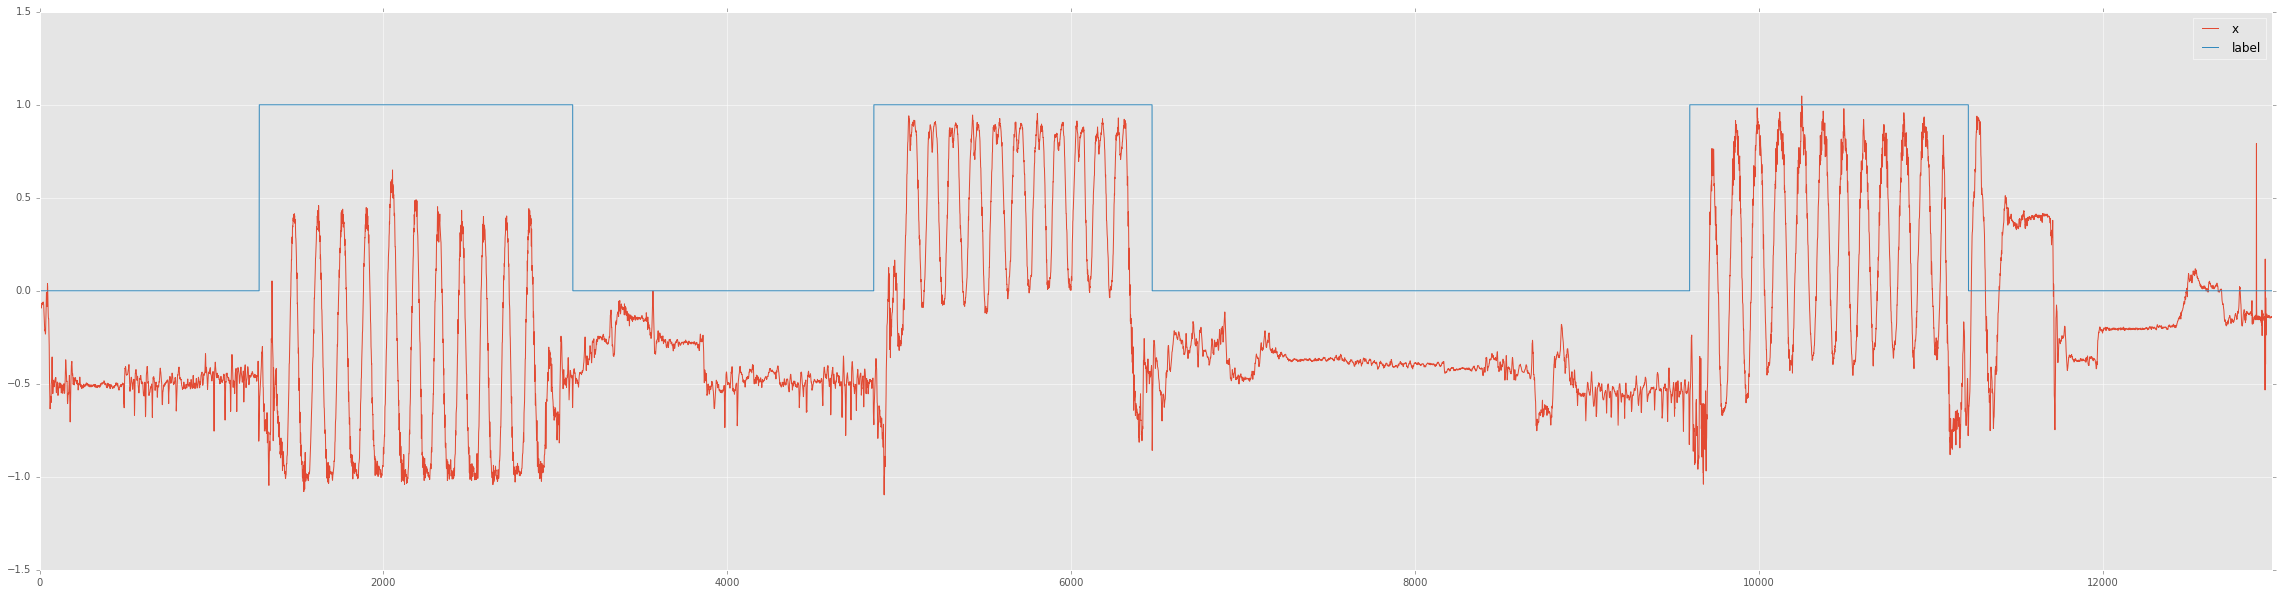

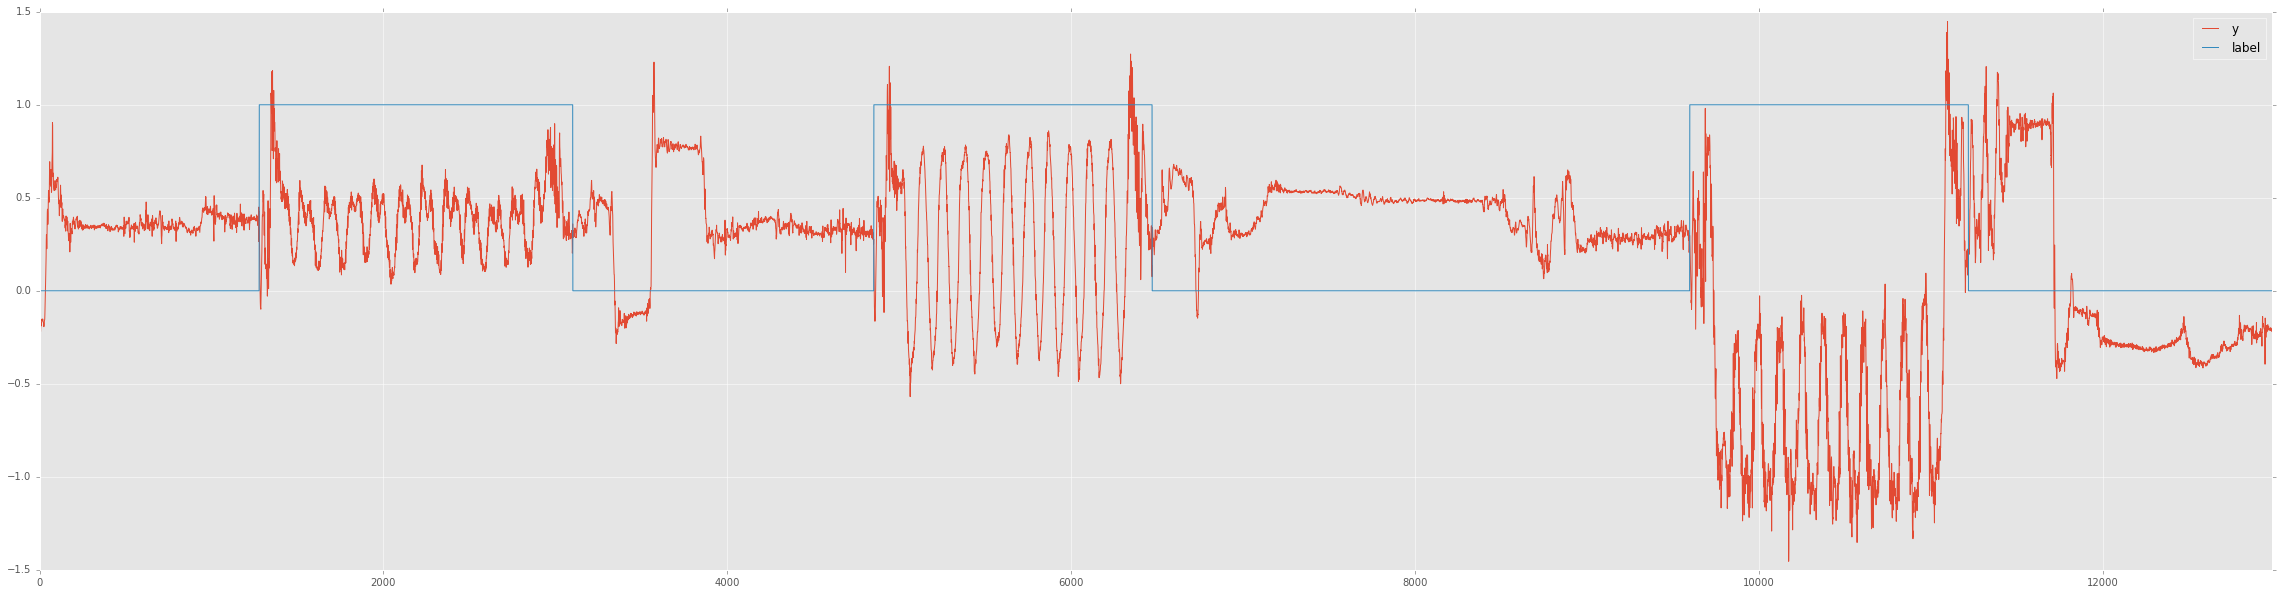

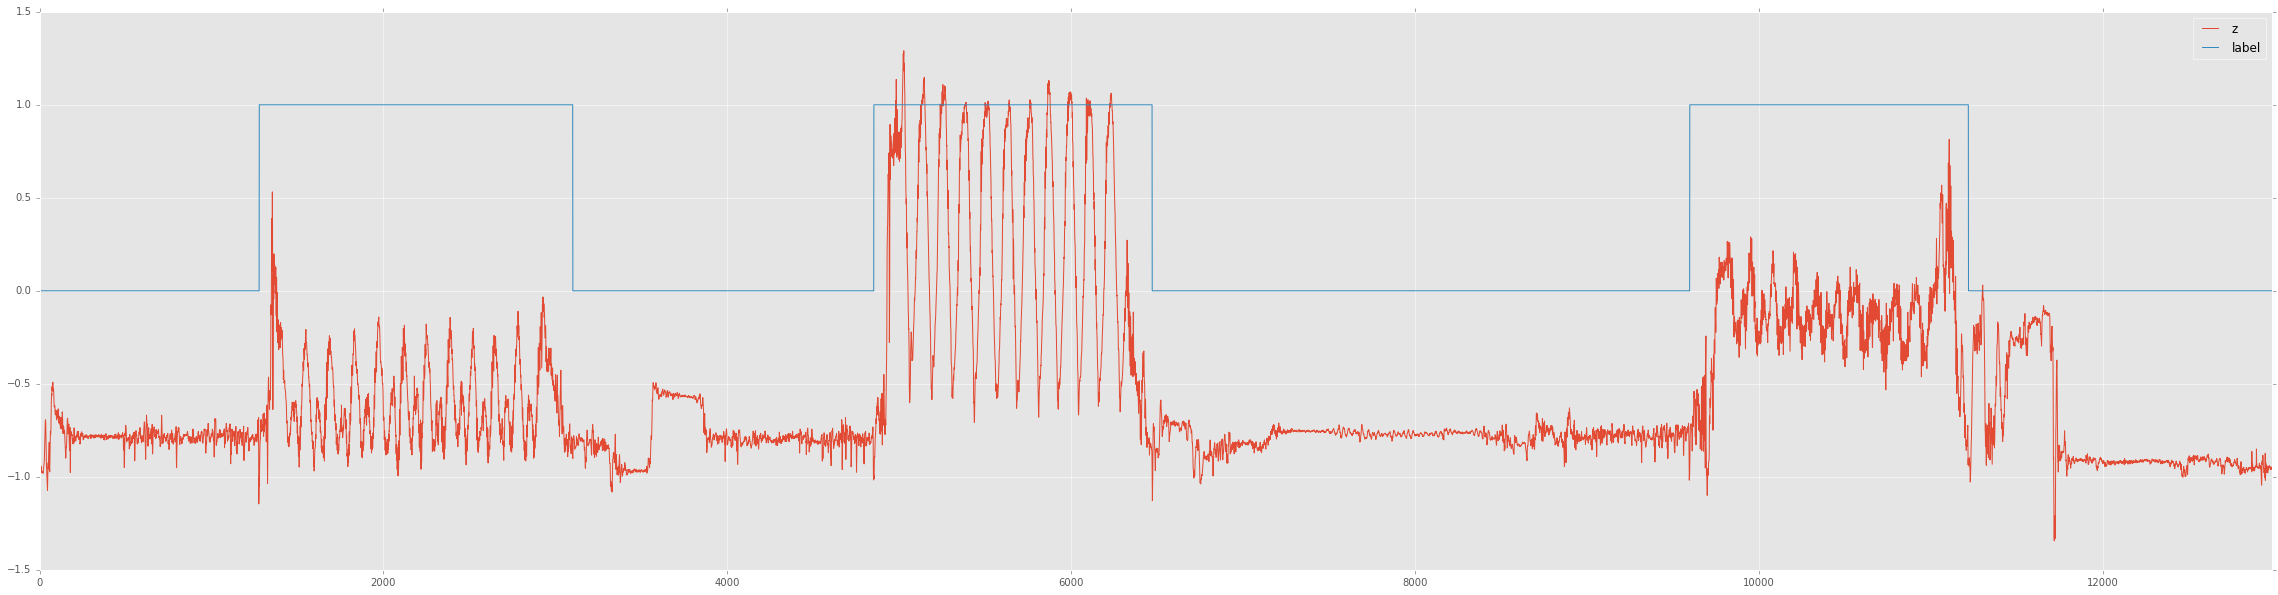

In [11]:
to_numeric(sample1)[['x', 'label']].plot(figsize=(40,10), style='-')
to_numeric(sample1)[['y', 'label']].plot(figsize=(40,10), style='-')
to_numeric(sample1)[['z', 'label']].plot(figsize=(40,10), style='-')

In [12]:
set_setup_column(sample1, start=0, end=50)

KeyError: "['setup_label'] not in index"

In [ ]:
sample1['setup_label'].value_counts()

In [ ]:
to_numeric(sample1)['setup_label'].value_counts()

In [ ]:
to_numeric(sample1)[['x', 'setup_label']].plot(figsize=(40,10), style='-')
to_numeric(sample1)[['y', 'setup_label']].plot(figsize=(40,10), style='-')
to_numeric(sample1)[['z', 'setup_label']].plot(figsize=(40,10), style='-')